### Завдання 1

При заданих цільових функціях і порогових обмеженнях визначити область Парето на заданому інтервалі при виконанні обмежень. Звузити область Парето, використовуючи прийоми технічних обмежень.

In [1]:
import numpy as np

import pandas as pd

import sympy as sp
from sympy.abc import x
from sympy import init_printing;
init_printing()

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f1 = lambda x: 9-6*x+x**2
f2 = lambda x: 18 - 9*x - 0.1*x**2
f1_star = 45
f2_star = 10
x_min = -5
x_max = 4
x_0_01 = np.linspace(x_min,x_max, 901)

Розв'яжемо нерівність f1<=f1\*:

In [3]:
#f1<=f1_star
sp.solve_poly_inequality(sp.Poly(9-6*x+x**2 - 45, x, domain='RR'), '<=')
#take left here

Розв'яжемо нерівність f2<=f2\*:

In [4]:
#f2>=f2_star
sp.solve_poly_inequality(sp.Poly(18 - 9*x - 0.1*x**2 - 10, x, domain='RR'), '>=')
#take right here

Будуємо графіки і зображуємо область Парето:

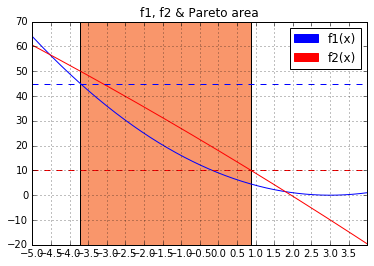

In [5]:
plt.figure(1)
fig1, ax1 = plt.subplots()
plt.plot(x_0_01,f1(x_0_01), 'b', x_0_01, f2(x_0_01), 'r')
plt.xticks(np.arange(-5,4,0.5))
plt.plot((-5, 4), (45, 45), 'b--')
plt.plot((-5, 4), (10, 10), 'r--')
plt.grid(True)
plt.plot()
ax1.fill_between(np.linspace(float(sp.solve(9-6*x+x**2 - 45, x)[1]),float(sp.solve(18 - 9*x - 0.1*x**2 - 10, x)[1]), 100), -20,70, facecolor='#F9966B')
plt.title('f1, f2 & Pareto area')
blue_patch = mpatches.Patch(color='blue', label="f1(x)")
red_patch = mpatches.Patch(color='red', label='f2(x)')
plt.legend(handles=[blue_patch, red_patch])

Застосовуємо метод технічних обмежень. Для цього зображуємо графіки f1/f1\*, f2/f2\*.

In [8]:
print"Pareto_left = %f. \nPareto right = %f.\nPareto_right - Pareto_left = %f."%(round(float(-3*np.sqrt(5)+3),3), round(float(np.sqrt(2105)-45),3), round(round(float(np.sqrt(2105)-45),3)-round(float(-3*np.sqrt(5)+3),3),3))
num_intervals_1 = int(round(round(float(np.sqrt(2105)-45),3)-round(float(-3*np.sqrt(5)+3),3),3)/0.001)+1
print"Number of intervals (by 0.001): %i."%(num_intervals_1)

x_Pareto_0_001=np.linspace(round(float(-3*np.sqrt(5)+3),3),round(float(np.sqrt(2105)-45),3), num_intervals_1)

Pareto_left = -3.708000. 
Pareto right = 0.880000.
Pareto_right - Pareto_left = 4.588000.
Number of intervals (by 0.001): 4589.


In [9]:
def max_df_1(x, y):
    returnvec=np.zeros(x.shape)
    for i in range(0, x.shape[0]):
        if x.iloc[i]<y.iloc[i]:
            returnvec[i]=y.iloc[i]
        else:
            returnvec[i]=x.iloc[i]
    return returnvec
def min_df_1(x, y):
    returnvec=np.zeros(x.shape)
    for i in range(0, x.shape[0]):
        if x.iloc[i]>y.iloc[i]:
            returnvec[i]=y.iloc[i]
        else:
            returnvec[i]=x.iloc[i]
    return returnvec

In [10]:
df_1 = pd.DataFrame(index=x_Pareto_0_001)
df_1['f1/f1*'] = f1(x_Pareto_0_001)/f1_star
df_1['f2/f2*'] = f2(x_Pareto_0_001)/f2_star
df_1['max(f_i/f_i*)'] = max_df_1(df_1['f1/f1*'], df_1['f2/f2*'])
df_1['min(max(f_i/f_i*))']=''
for i in range(0,df_1.shape[0]):
    if df_1['max(f_i/f_i*)'].iloc[i]==min(df_1['max(f_i/f_i*)']):
        df_1['min(max(f_i/f_i*))'].iloc[i] = min(df_1['max(f_i/f_i*)'])
df_1['min(f_i/f_i*)'] = min_df_1(df_1['f1/f1*'], df_1['f2/f2*'])
df_1['max(min(f_i/f_i*))']=''
for i in range(0,df_1.shape[0]):
    if df_1['min(f_i/f_i*)'].iloc[i]==max(df_1['min(f_i/f_i*)']):
        df_1['max(min(f_i/f_i*))'].iloc[i] = max(df_1['min(f_i/f_i*)'])
df_1

/home/alextr/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,f1/f1*,f2/f2*,max(f_i/f_i*),min(max(f_i/f_i*)),min(f_i/f_i*),max(min(f_i/f_i*))
-3.708,0.999939,4.999707,4.999707,,0.999939,0.999939
-3.707,0.999641,4.998882,4.998882,,0.999641,
-3.706,0.999343,4.998056,4.998056,,0.999343,
-3.705,0.999045,4.997230,4.997230,,0.999045,
-3.704,0.998747,4.996404,4.996404,,0.998747,
-3.703,0.998449,4.995578,4.995578,,0.998449,
-3.702,0.998151,4.994752,4.994752,,0.998151,
-3.701,0.997853,4.993926,4.993926,,0.997853,
-3.700,0.997556,4.993100,4.993100,,0.997556,
-3.699,0.997258,4.992274,4.992274,,0.997258,


Точки перетину f1/f1* та f2/f2*:


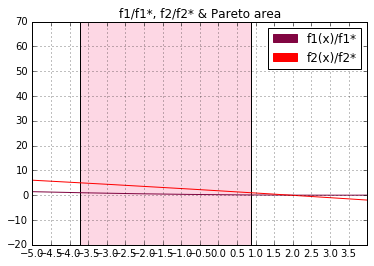

In [11]:
plt.figure(2)
fig2, ax2 = plt.subplots()
plt.plot(x_0_01,f1(x_0_01)/45, '#810541', x_0_01, f2(x_0_01)/10, 'r')
plt.xticks(np.arange(-5,4,0.5))
plt.grid(True)
plt.title('f1/f1*, f2/f2* & Pareto area')
ax2.fill_between(np.linspace(float(sp.solve(9-6*x+x**2 - 45, x)[1]),float(sp.solve(18 - 9*x - 0.1*x**2 - 10, x)[1]), 100), -20,70, facecolor='#FDD7E4')
maroon_patch = mpatches.Patch(color='#810541', label="f1(x)/f1*")
red_patch = mpatches.Patch(color='r', label='f2(x)/f2*')
plt.legend(handles=[maroon_patch, red_patch])

print("Точки перетину f1/f1* та f2/f2*:")
sp.solve((18 - 9*x - 0.1*x**2)/10 - (9-6*x+x**2)/45, x)

Можемо бачити, що метод технічних обмежень не звужує множину Парето, оскільки внаслідок використання принципів макcиміна/мінімакса, отримуємо множину, що містить дві точки і лежить ПОЗА множиною Парето.
А оскільки ми розглядаємо дані функції на лише множині Парето (бо її нам потрібно звузити) і, відповідно до теорії, множина Парето лежить між двома точками, в яких досягаються $\min_x\max_i\frac{f_i}{f_i^*}$ та  $\max_x\min_i\frac{f_i}{f_i^*}$, то, як видно з графіка, множина Парето лежить між точками $-3\sqrt{5}+3$ та $\sqrt{2105}-45$.

Отже, множина Парето: $[-3\sqrt{5}+3, \sqrt{2105}-45]$.

### Завдання 2

In [169]:
f1 = lambda x, y: 6*(3*x**2 + 5*x*y + 4*x)/5
f2 = lambda x, y: -4*x**2 + 2*x*y + 0.25*y**3 + 3
x_min = 1
x_max = 5
num_0_02 = int((x_max - x_min)/0.02)+1
x_0_02 = np.linspace(x_min,x_max, num_0_02)

#### Табличний метод

In [170]:
df_2 = pd.DataFrame(index=range(len(x_0_02)*len(x_0_02)))

In [171]:
def fill_table_with_x(df):
    for i in range(len(x_0_02)):
        df.iloc[i*len(x_0_02):(i+1)*len(x_0_02), 0] = x_0_02[i]
        df.iloc[i*len(x_0_02):(i+1)*len(x_0_02), 1] = x_0_02[0:len(x_0_02)]
    return 0

In [172]:
df_2['x1']=0
df_2['x2']=0
fill_table_with_x(df_2)

In [173]:
df_2['f1(x1,x2)'] = f1(df_2['x1'], df_2['x2'])
df_2['f2(x1,x2)'] = f2(df_2['x1'], df_2['x2'])
df_2.head(10)

,x1,x2,"f1(x1,x2)","f2(x1,x2)"
0,1.0,1.00,14.40,1.250000
1,1.0,1.02,14.52,1.305302
2,1.0,1.04,14.64,1.361216
3,1.0,1.06,14.76,1.417754
4,1.0,1.08,14.88,1.474928
5,1.0,1.10,15.00,1.532750
6,1.0,1.12,15.12,1.591232
7,1.0,1.14,15.24,1.650386
8,1.0,1.16,15.36,1.710224
9,1.0,1.18,15.48,1.770758


Знаходжу гарантований мінімум, який матиме 1й гравець при кожному із генерованих ним значень х1 = (1, 1.2, 1.4, ..., 5). Тут вважаю, що 2й гравець хоче завалити 1го і надсилає йому якомога гірші х2 при будь-якому розкладі на х1 у 1го гравця (тобто якщо я 1й гравець і обираю х1=3, то який х2 дасть мені найгірший результат??? А якщо оберу х1=4.5, то тоді при якому х2 результат буде найпаскуднішим? І отак перебираю між своїми стратегіями і знаходжу для кожного значення х1 де найгірший х2 що дає найгірше значення моєї функції f1, тобто знаходжу мінімум f1 при фіксованій мною стратегії х1.). А потім обираю максимальний серед цих мінінмумів, оскільки хочу знати, який х1 обрати в своїй стратегії, аби навіть при поганих х2 від 2го гравця отримати якнайкращий результат.

In [174]:
df_2['min_x2(f1(x1,x2))'] = 0
for i in range(len(x_0_02)):
    min_x2 = min( df_2.iloc[ np.where(df_2['x1']==x_0_02[i])[0], 2] )
    df_2.iloc[np.where(df_2['x1']==x_0_02[i])[0], 4]= min_x2

In [175]:
max_x1_min_x2 = max(pd.to_numeric(df_2['min_x2(f1(x1,x2))'], errors='coerce'))
df_2['max_x1_min_x2(f1(x1,x2))']=max_x1_min_x2

Аналогічно.

In [176]:
df_2['min_x1(f2(x1,x2))'] = 0
for i in range(len(x_0_02)):
    min_x1 = min( df_2.iloc[ np.where(df_2['x2']==x_0_02[i])[0], 3] )
    df_2.iloc[np.where(df_2['x2']==x_0_02[i])[0], 6]= min_x1

In [177]:
max_x2_min_x1 = max(pd.to_numeric(df_2['min_x1(f2(x1,x2))'], errors='coerce'))
df_2['max_x2_min_x1(f2(x1,x2))']=max_x2_min_x1

In [178]:
df_2.iloc[np.where(df_2['max_x1_min_x2(f1(x1,x2))']==df_2['f1(x1,x2)'])]

,x1,x2,"f1(x1,x2)","f2(x1,x2)","min_x2(f1(x1,x2))","max_x1_min_x2(f1(x1,x2))","min_x1(f2(x1,x2))","max_x2_min_x1(f2(x1,x2))"
30240,4.0,2.8,144.0,-33.112,100.8,144.0,-63.512,-15.75
40200,5.0,1.0,144.0,-86.750,144.0,144.0,-86.750,-15.75


Але х2=2.8 не є точкою мінімума при х1=4.0, тож єдиним розв'язком є х1=5.0, х2=1.0.

In [179]:
df_2.iloc[np.where(df_2['max_x2_min_x1(f2(x1,x2))']==df_2['f2(x1,x2)'])]

,x1,x2,"f1(x1,x2)","f2(x1,x2)","min_x2(f1(x1,x2))","max_x1_min_x2(f1(x1,x2))","min_x1(f2(x1,x2))","max_x2_min_x1(f2(x1,x2))"
40400,5.0,5.0,264.0,-15.75,144.0,144.0,-15.75,-15.75


#### Графічний метод

In [180]:
x2_12345 = df_2.iloc[np.where(df_2['x1']==1.)[0], 1]
y1_1 = df_2.iloc[np.where(df_2['x1']==1.)[0], 2]
y1_2 = df_2.iloc[np.where(df_2['x1']==2.)[0], 2]
y1_3 = df_2.iloc[np.where(df_2['x1']==3.)[0], 2]
y1_4 = df_2.iloc[np.where(df_2['x1']==4.)[0], 2]
y1_5 = df_2.iloc[np.where(df_2['x1']==5.)[0], 2]

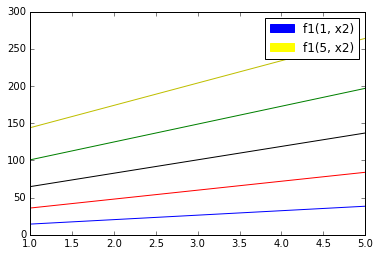

In [181]:
plt.figure(1)
fig1, ax1 = plt.subplots()
plt.plot(x2_12345,y1_1,'b', x2_12345,y1_2,'r', x2_12345,y1_3,'k', x2_12345,y1_4,'g', x2_12345,y1_5,'y')
blue_patch = mpatches.Patch(color='blue', label="f1(1, x2)")
yellow_patch = mpatches.Patch(color='yellow', label='f1(5, x2)')
plt.legend(handles=[blue_patch, yellow_patch])

Як бачимо, максимальний мінімум функції f1 досягається при х1=5 і х2=1, і дорівнює 144.

In [182]:
x1_12345 = df_2.iloc[np.where(df_2['x1']==1.)[0], 1]
y2_1 = df_2.iloc[np.where(df_2['x2']==1.)[0], 3]
y2_2 = df_2.iloc[np.where(df_2['x2']==2.)[0], 3]
y2_3 = df_2.iloc[np.where(df_2['x2']==3.)[0], 3]
y2_4 = df_2.iloc[np.where(df_2['x2']==4.)[0], 3]
y2_5 = df_2.iloc[np.where(df_2['x2']==5.)[0], 3]

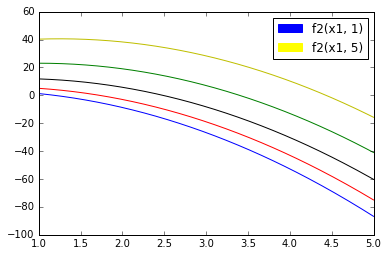

In [183]:
plt.figure(2)
fig1, ax1 = plt.subplots()
plt.plot(x2_12345,y2_1,'b', x2_12345,y2_2,'r', x2_12345,y2_3,'k', x2_12345,y2_4,'g', x2_12345,y2_5,'y')
blue_patch = mpatches.Patch(color='blue', label="f2(x1, 1)")
yellow_patch = mpatches.Patch(color='yellow', label='f2(x1, 5)')
plt.legend(handles=[blue_patch, yellow_patch])

Як бачимо, максимальний мінімум функції f2 досягається при х2=5 і х1=5, і дорівнює -15.75.

#### Класичний метод

За класичним методом все зійшлося.

#### Знаходження області Парето

In [187]:
f1_star = max_x1_min_x2
f2_star = max_x2_min_x1
print f1_star
print f2_star

144.0
-15.75


$$f_1(x_1, x_2) >= f_1^* ----and---- f_2(x_1, x_2) <= f_2^*$$

$$\frac{18 x_1^{2}}{5} + 6 x_1 x_2 + \frac{24 x_1}{5} \geq 144$$

$$- 4 x_1^{2} + 2 x_1 x_2 + \frac{x_2^{3}}{4} + 3 \geq - \frac{63}{4}$$

$$x_1 \leq 5$$

$$x_1 \geq 1$$

$$x_2 \leq 5$$

$$x_2 \geq 1$$


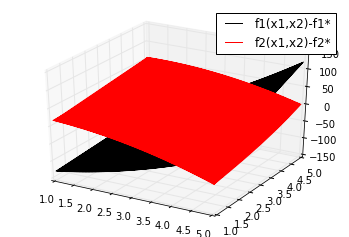

In [204]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_2['x1'], df_2['x2'], df_2['f1(x1,x2)']-f1_star, 'k', label='f1(x1,x2)-f1*')
ax.plot(df_2['x1'], df_2['x2'], df_2['f2(x1,x2)']-f2_star, 'r', label='f2(x1,x2)-f2*')
ax.legend()

-------------------------------------

Шукаємо область Парето, тобто ту область, в якій 1й супротивник матиме змогу поліпшувати свій результат за гарантований, тобто там, де сигнали х2 будуть кращими за найгірші можливі. 

##### Inequality:

$$\frac{18 x_1^{2}}{5} + 6 x_1 x_2 + \frac{24 x_1}{5} \geq 144$$

###### Solution:

!['f1'](img/2_Pareto_f1.gif)

-----------------------------------------

Шукаємо область Парето, тобто ту область, в якій 2й супротивник матиме змогу поліпшувати свій результат за гарантований, тобто там, де сигнали х1 будуть кращими за найгірші можливі. 

##### Inequality:

$$- 4 x_1^{2} + 2 x_1 x_2 + \frac{x_2^{3}}{4} + 3 \geq - \frac{63}{4}$$


###### Solution:

!['f2'](img/2_Pareto_f2.gif)

-------------------------

Система нерівностей виконується при (х,у), що належать наступній області (враховуючи області визначення х1 і х2):

!['XY'](img/2_PAreto_x1x2_cropped.gif)

Як можемо бачити, оптимальна точка (5,5) для 2го гравця вхoдить до області Парето, в той час як оптимальна точка (5,1) для 1го гравця не належить до області Парето. І це логічно, адже область Парето - область, в якій значення функцій задовольнять обох гравців (а саме 100відсотково вони отримуватимуть результат, більший за гарантований).

#### Знаходження мінімального delta

Дельта - для кожної пари (х1, х2) знаходимо максимальний вектор нев'язки ( на скільки фактичне значення відрізняється від гарантованого(мінімального; при поганих умовах) ), і потім знаходимо таку пару (х1, х2), де ця різниця від гарантованого буде мінімальною для ОБОХ! гравців (за модулем), тобто кожен втратить мінімально і виграє максимально. Тобто дельта - оптимальний розв'язок задачі! І аби виграли обоє, дельта має прагнути до нуля.

In [298]:
df_delta = pd.DataFrame()

In [299]:
df_delta['x1'] = df_2['x1']
df_delta['x2'] = df_2['x2']
df_delta['|f1-f1*|'] = abs(df_2['f1(x1,x2)'] - f1_star)
df_delta['|f2-f2*|'] = abs(df_2['f2(x1,x2)'] - f2_star)

In [303]:
def max_df_delta(x, y):
    returnvec=np.zeros(x.shape)
    for i in range(0, x.shape[0]):
        if x.iloc[i]<y.iloc[i]:
            returnvec[i]=y.iloc[i]
        else:
            returnvec[i]=x.iloc[i]
    return returnvec

Знаходимо максимум з-поміж $\Delta_i$ ітих для кожної пари $(х_1,х_2)$.

In [304]:
df_delta['max(delta_i)'] = max_df_delta(df_delta['|f1-f1*|'], df_delta['|f2-f2*|'])

In [306]:
df_delta.iloc[np.where(df_delta['max(delta_i)']==min(df_delta['max(delta_i)']))]

,x1,x2,|f1-f1*|,|f2-f2*|,max(delta_i)
27258,3.7,3.46,0.144,0.050566,0.144


Тобто оптимальні значення $(x_1^*, x_2^*)$ ~ (3.7, 3.46).

!['opt'](img/2_PAreto_x1x2_cropped_opt.png)